In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<Axes: title={'center': 'Correlation between all the features'}>

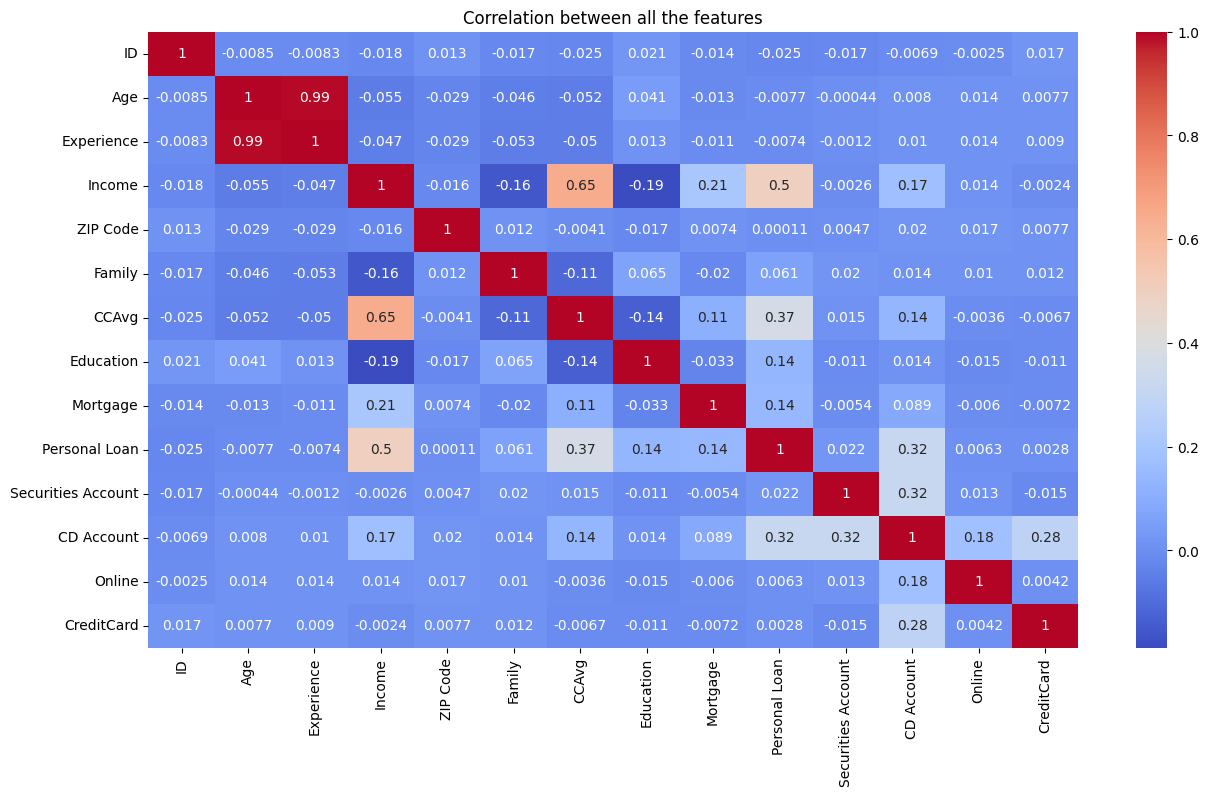

In [4]:
import seaborn as sns

plt.figure(figsize=(15,8))
plt.title("Correlation between all the features")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [10]:
zero_class = df[df["CreditCard"]==0]
one_class = df[df["CreditCard"]==1]

In [11]:
df["CreditCard"].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

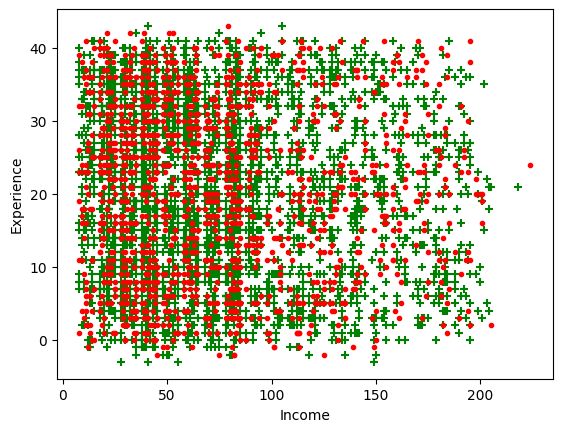

In [12]:
# Income vs Experience scatter plot
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(zero_class['Income'],zero_class['Experience'], color = 'green', marker='+')
plt.scatter(one_class['Income'], one_class['Experience'], color = 'red', marker='.')

In [18]:
X = df.drop("CreditCard", axis=1)
y = df["CreditCard"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # ✅ Only transform test data (DO NOT fit again)

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svm = SVC()

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [22]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.752
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       889
           1       0.88      0.16      0.28       361

    accuracy                           0.75      1250
   macro avg       0.81      0.58      0.56      1250
weighted avg       0.78      0.75      0.68      1250



<Axes: >

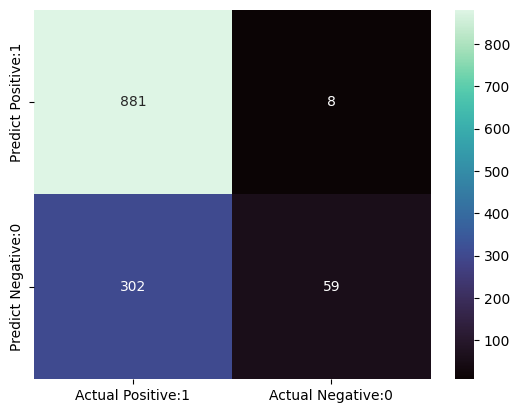

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [ ]:
# param_grid = {
#     "C": [0.01, 0.1, 1, 10, 100],
#     "kernel": ["linear", "rbf", "poly", "sigmoid"],
#     "gamma": [0.1, 0.01, 1],
#     "degree": [1,2,3],
#     "class_weight": ["balanced"]
# }

In [ ]:
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(SVC(), param_grid= param_grid, refit= True, cv= 5, verbose= 3)

In [ ]:
# grid.fit(X_train, y_train)
# grid.predict(X_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.01, class_weight=balanced, degree=1, gamma=0.1, kernel=linear;, score=0.729 total time=   1.2s
[CV 2/5] END C=0.01, class_weight=balanced, degree=1, gamma=0.1, kernel=linear;, score=0.735 total time=   1.0s
[CV 3/5] END C=0.01, class_weight=balanced, degree=1, gamma=0.1, kernel=linear;, score=0.745 total time=   0.7s
[CV 4/5] END C=0.01, class_weight=balanced, degree=1, gamma=0.1, kernel=linear;, score=0.733 total time=   0.7s
[CV 5/5] END C=0.01, class_weight=balanced, degree=1, gamma=0.1, kernel=linear;, score=0.748 total time=   1.0s
[CV 1/5] END C=0.01, class_weight=balanced, degree=1, gamma=0.1, kernel=rbf;, score=0.296 total time=   2.3s
[CV 2/5] END C=0.01, class_weight=balanced, degree=1, gamma=0.1, kernel=rbf;, score=0.296 total time=   3.0s
[CV 3/5] END C=0.01, class_weight=balanced, degree=1, gamma=0.1, kernel=rbf;, score=0.296 total time=   2.0s
[CV 4/5] END C=0.01, class_weight=balanced, degree